# Задача многоклассовой классификации, предсказание оценок слушателей за экзамен

## Mounting a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,  auc
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Load the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/exams_Mclassify.csv')
data

,Unnamed: 0,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
0,0,1,0,1,0,0,1,0,0,0,0,0,0,83.333333,4
1,1,1,0,0,1,0,0,0,1,0,0,1,0,75.000000,4
2,2,0,0,1,0,0,0,0,1,0,0,0,0,50.000000,4
3,3,1,0,1,0,0,0,0,0,1,0,1,1,61.333333,4
4,4,1,0,0,0,0,0,0,0,0,1,1,1,56.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1,1,0,0,0,0,0,1,0,0,1,0,73.000000,4
996,996,1,0,0,1,0,0,1,0,0,0,0,0,61.000000,4
997,997,1,1,0,0,0,0,0,0,1,0,1,0,60.666667,4
998,998,1,1,0,0,0,1,0,0,0,0,1,0,73.666667,4


In [ ]:
data = data.drop(columns = ['Unnamed: 0'])
data

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
0,1,0,1,0,0,1,0,0,0,0,0,0,83.333333,4
1,1,0,0,1,0,0,0,1,0,0,1,0,75.000000,4
2,0,0,1,0,0,0,0,1,0,0,0,0,50.000000,4
3,1,0,1,0,0,0,0,0,1,0,1,1,61.333333,4
4,1,0,0,0,0,0,0,0,0,1,1,1,56.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,0,1,0,0,1,0,73.000000,4
996,1,0,0,1,0,0,1,0,0,0,0,0,61.000000,4
997,1,1,0,0,0,0,0,0,1,0,1,0,60.666667,4
998,1,1,0,0,0,1,0,0,0,0,1,0,73.666667,4


Возьмём данные о слушателях

Описание датасета: <br>

* gender_male: это признак пола. Значение "1" обозначает мужской пол, а "0" - женский.
* race_group B: этот признак указывает на принадлежность к группе расы B. Значение "1" указывает на принадлежность к этой группе, а "0" - наоборот.
* race_group C: аналогично предыдущему, но для группы расы C.
* race_group D: аналогично предыдущему, но для группы расы D.
* race_group E: аналогично предыдущему, но для группы расы E.
* education_bachelor's degree: этот признак обозначает наличие бакалаврской степени образования. "1" означает наличие такой степени, а "0" - ее отсутствие.
* education_high school: этот признак указывает на наличие среднего образования. "1" означает наличие среднего образования, а "0" - его отсутствие.
* education_master's degree: аналогично предыдущему, но для магистерской степени образования.
* education_some college: аналогично предыдущему, но для наличия некоторого колледжа в образовании.
* education_some high school: аналогично предыдущему, но для наличия средней школы в образовании.
* lunch_standard: этот признак указывает на тип обеда. "1" означает стандартный обед, а "0" - нестандартный.
* preparation_none: этот признак указывает на отсутствие подготовки к тесту. "1" означает отсутствие подготовки, а "0" - наличие.
* mean_res: это числовой признак, предположительно, среднее значение результатов тестов.

Необходимо решить задачу классификации и научиться предсказывать целевой признак **exam** - оценку слушателя за экзамен.

## Exploratory Data Analysis (EDA)

In [ ]:
data.head(10)

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
0,1,0,1,0,0,1,0,0,0,0,0,0,83.333333,4
1,1,0,0,1,0,0,0,1,0,0,1,0,75.000000,4
2,0,0,1,0,0,0,0,1,0,0,0,0,50.000000,4
3,1,0,1,0,0,0,0,0,1,0,1,1,61.333333,4
4,1,0,0,0,0,0,0,0,0,1,1,1,56.666667,4
5,0,0,1,0,0,0,0,0,0,1,1,1,53.666667,4
6,1,0,0,0,1,0,0,0,0,1,0,0,71.333333,4
7,0,0,1,0,0,0,0,0,0,1,0,0,70.000000,4
8,0,0,1,0,0,0,1,0,0,0,0,1,70.333333,4
9,1,0,0,1,0,0,0,0,1,0,0,1,70.666667,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender_male                  1000 non-null   int64  
 1   race_group B                 1000 non-null   int64  
 2   race_group C                 1000 non-null   int64  
 3   race_group D                 1000 non-null   int64  
 4   race_group E                 1000 non-null   int64  
 5   education_bachelor's degree  1000 non-null   int64  
 6   education_high school        1000 non-null   int64  
 7   education_master's degree    1000 non-null   int64  
 8   education_some college       1000 non-null   int64  
 9   education_some high school   1000 non-null   int64  
 10  lunch_standard               1000 non-null   int64  
 11  preparation_none             1000 non-null   int64  
 12  mean_res                     1000 non-null   float64
 13  exam               

Видим, что пропусков в данных нет

In [ ]:
data.describe()

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.483000,0.189000,0.321000,0.284000,0.138000,0.120000,0.211000,0.076000,0.234000,0.197000,0.630000,0.644000,69.156333,3.972000
std,0.499961,0.391705,0.467094,0.451162,0.345073,0.325124,0.408223,0.265131,0.423584,0.397931,0.483046,0.479055,14.386126,0.448796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.333333,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,69.333333,4.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,80.333333,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,5.000000


In [ ]:
data.columns

Index(['gender_male', 'race_group B', 'race_group C', 'race_group D',
       'race_group E', 'education_bachelor's degree', 'education_high school',
       'education_master's degree', 'education_some college',
       'education_some high school', 'lunch_standard', 'preparation_none',
       'mean_res', 'exam'],
      dtype='object')

In [ ]:
data = data.drop_duplicates()
data

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
0,1,0,1,0,0,1,0,0,0,0,0,0,83.333333,4
1,1,0,0,1,0,0,0,1,0,0,1,0,75.000000,4
2,0,0,1,0,0,0,0,1,0,0,0,0,50.000000,4
3,1,0,1,0,0,0,0,0,1,0,1,1,61.333333,4
4,1,0,0,0,0,0,0,0,0,1,1,1,56.666667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,0,1,0,0,1,0,73.000000,4
996,1,0,0,1,0,0,1,0,0,0,0,0,61.000000,4
997,1,1,0,0,0,0,0,0,1,0,1,0,60.666667,4
998,1,1,0,0,0,1,0,0,0,0,1,0,73.666667,4


Набор данных уменьшился, значит в наборе данных были дубликаты - теперь все объекты в наборе данных уникальные

In [ ]:
data["exam"].value_counts()

exam
4    807
3     79
5     74
2     12
Name: count, dtype: int64

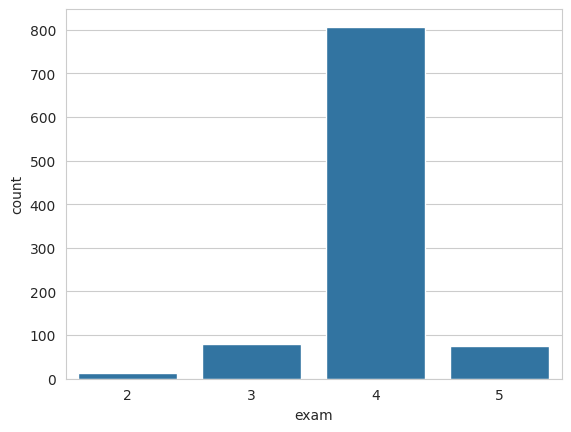

In [ ]:
sns.countplot(x="exam", data=data)
plt.show()

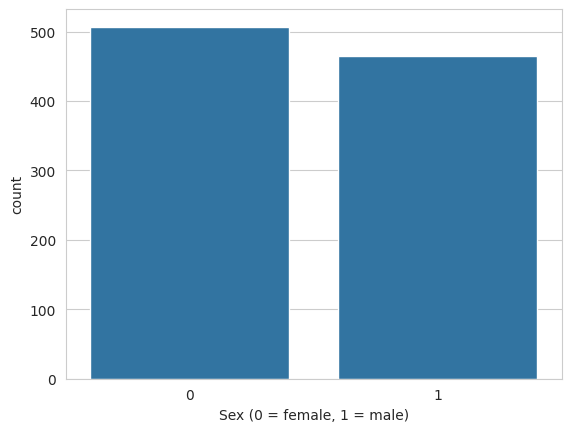

In [ ]:
sns.countplot(x='gender_male', data=data)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [ ]:
data.groupby('exam').mean()

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res
exam,,,,,,,,,,,,,
2,0.500000,0.500000,0.416667,0.083333,0.000000,0.083333,0.333333,0.000000,0.166667,0.333333,0.166667,0.916667,30.416667
3,0.607595,0.253165,0.341772,0.240506,0.075949,0.050633,0.253165,0.063291,0.227848,0.291139,0.405063,0.746835,44.345992
4,0.484511,0.187113,0.320942,0.286245,0.136307,0.122677,0.210657,0.073110,0.225527,0.197026,0.630731,0.653036,69.855019
5,0.270270,0.121622,0.216216,0.324324,0.270270,0.189189,0.121622,0.135135,0.283784,0.094595,0.891892,0.324324,94.243243


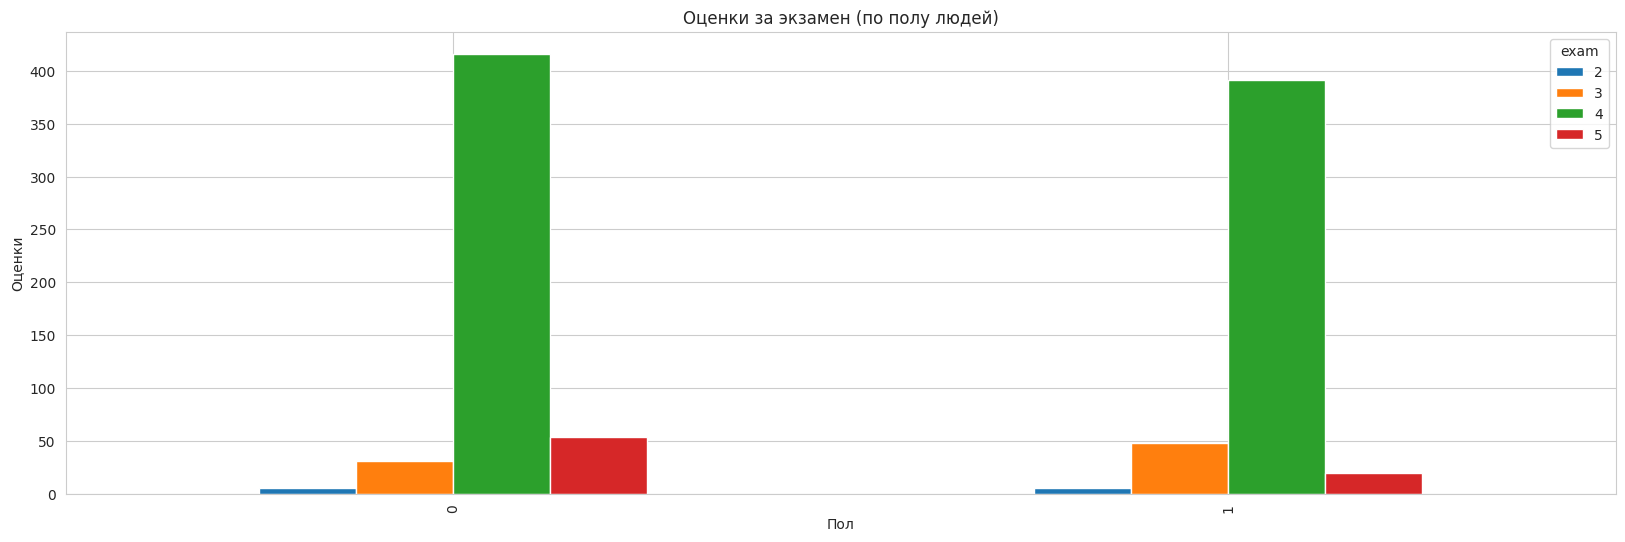

In [ ]:
pd.crosstab(data.gender_male, data.exam).plot(kind="bar", figsize=(20, 6))
plt.title('Оценки за экзамен (по полу людей)')
plt.xlabel('Пол')
plt.ylabel('Оценки')
plt.show()

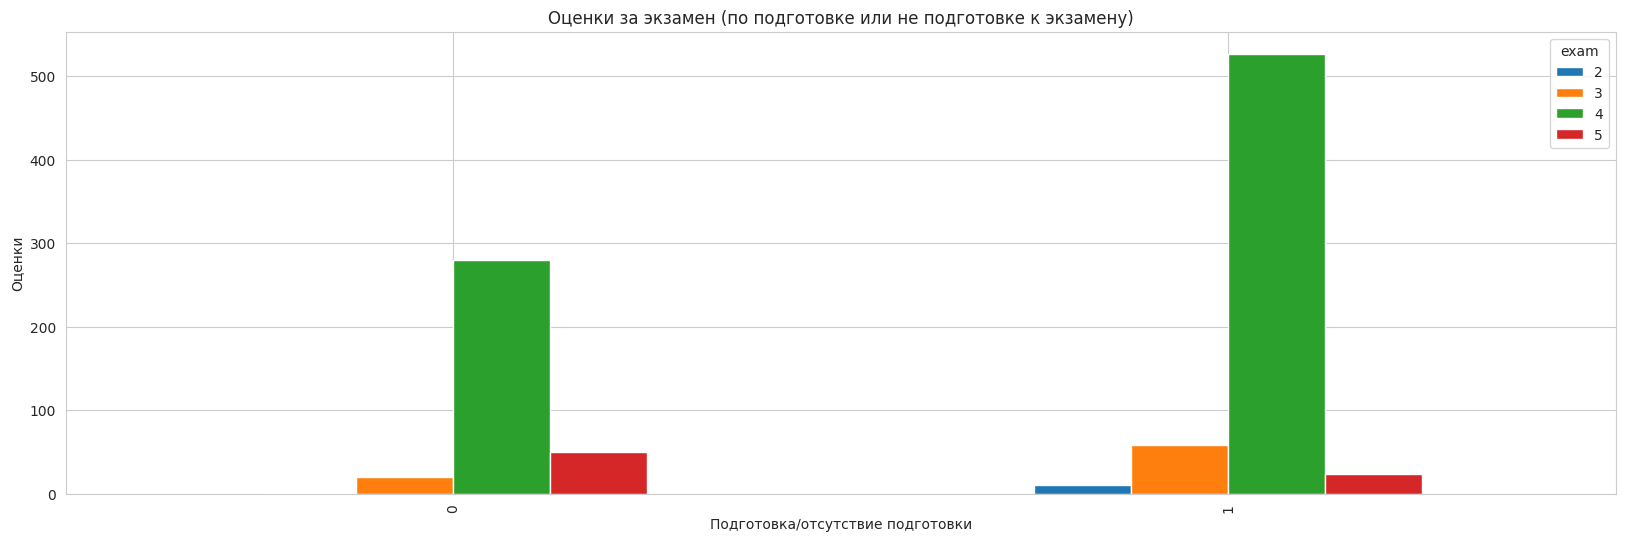

In [ ]:
pd.crosstab(data.preparation_none, data.exam).plot(kind="bar", figsize=(20, 6))
plt.title('Оценки за экзамен (по подготовке или не подготовке к экзамену)')
plt.xlabel('Подготовка/отсутствие подготовки')
plt.ylabel('Оценки')
plt.show()

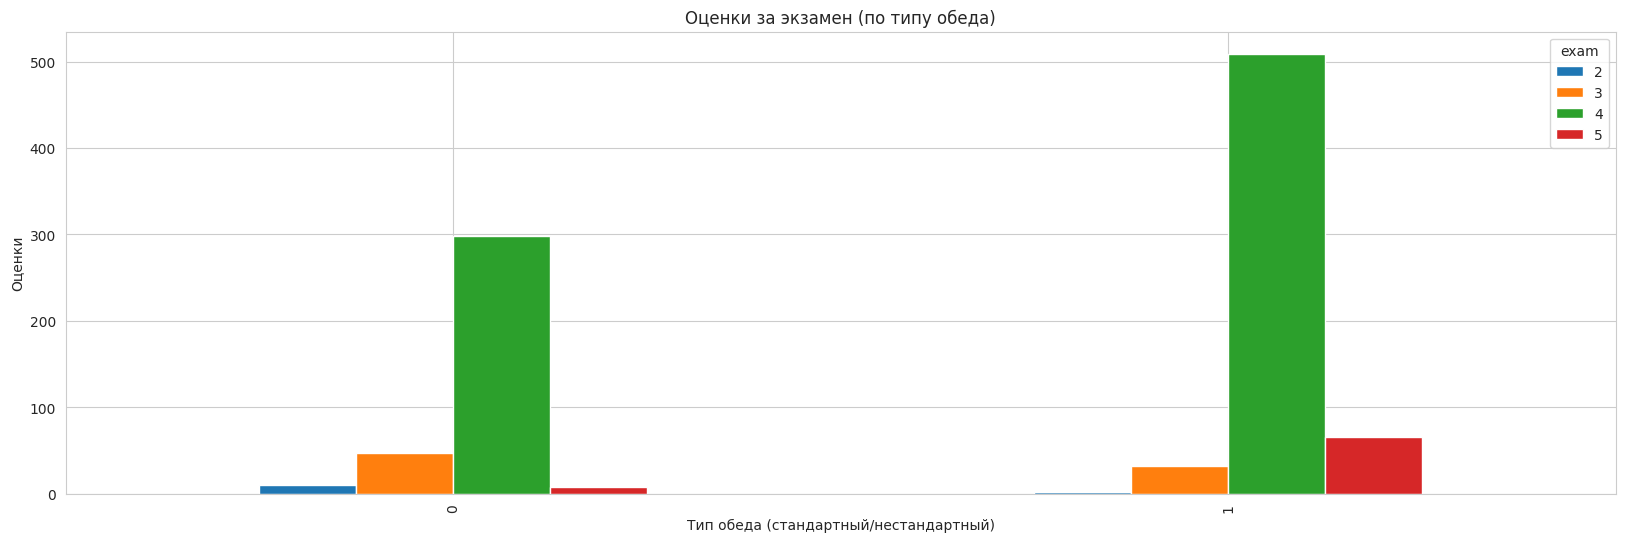

In [ ]:
pd.crosstab(data.lunch_standard, data.exam).plot(kind="bar", figsize=(20, 6))
plt.title('Оценки за экзамен (по типу обеда)')
plt.xlabel('Тип обеда (стандартный/нестандартный)')
plt.ylabel('Оценки')
plt.show()

In [ ]:
data.corr()

,gender_male,race_group B,race_group C,race_group D,race_group E,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,lunch_standard,preparation_none,mean_res,exam
gender_male,1.000000,-0.026081,-0.025995,0.002018,0.035255,0.041302,-0.020845,0.004650,-0.013138,-0.058496,-0.027005,-0.038948,-0.128683,-0.118583
race_group B,-0.026081,1.000000,-0.330524,-0.305559,-0.196206,0.003361,-0.056914,0.057586,-0.010405,-0.019223,-0.002904,-0.037208,-0.083864,-0.100581
race_group C,-0.025995,-0.330524,1.000000,-0.426784,-0.274047,0.011727,-0.027857,-0.044834,0.039830,0.022426,-0.033623,0.008575,-0.082834,-0.057751
race_group D,0.002018,-0.305559,-0.426784,1.000000,-0.253347,-0.002691,0.020043,0.000549,-0.022227,0.002268,0.022196,0.029985,0.051240,0.056401
race_group E,0.035255,-0.196206,-0.274047,-0.253347,1.000000,-0.004634,0.040833,-0.003958,-0.008476,-0.007465,-0.025811,-0.005488,0.157098,0.118021
education_bachelor's degree,0.041302,0.003361,0.011727,-0.002691,-0.004634,1.000000,-0.190984,-0.106706,-0.202826,-0.185021,-0.045144,-0.028784,0.059969,0.079979
education_high school,-0.020845,-0.056914,-0.027857,0.020043,0.040833,-0.190984,1.000000,-0.147490,-0.280347,-0.255738,-0.016682,-0.014198,-0.094362,-0.072195
education_master's degree,0.004650,0.057586,-0.044834,0.000549,-0.003958,-0.106706,-0.147490,1.000000,-0.156635,-0.142885,0.021138,0.005833,0.095718,0.061620
education_some college,-0.013138,-0.010405,0.039830,-0.022227,-0.008476,-0.202826,-0.280347,-0.156635,1.000000,-0.271595,0.001421,-0.002406,0.044736,0.030485
education_some high school,-0.058496,-0.019223,0.022426,0.002268,-0.007465,-0.185021,-0.255738,-0.142885,-0.271595,1.000000,0.053727,0.046683,-0.103478,-0.103679


## Корреляционная матрица по всему набору данных

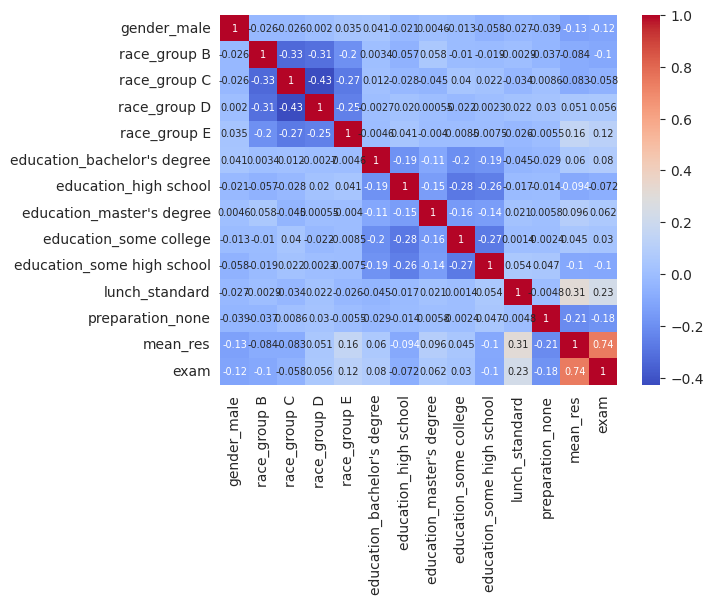

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 7})
plt.show()

Из построения корреляционной матрицы видим, что основное влияние на целевую переменную оказывает 1 признак: mean_res. В дальнейшем будем использовать именно его для построения моделей машинного обучения.

## Корреляционные матрицы по различным группам признаков

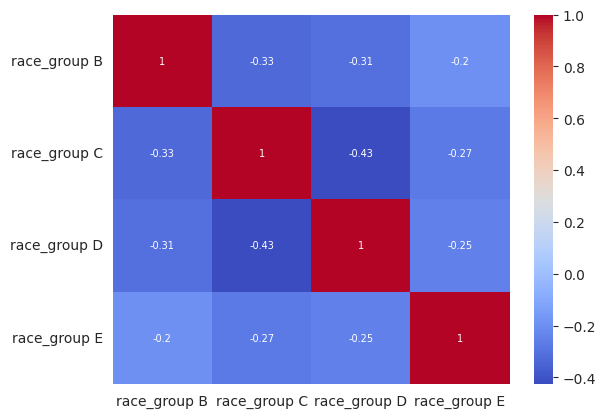

In [ ]:
selected_features = data[['race_group B', 'race_group C', 'race_group D', 'race_group E']]
correlation_matrix = selected_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 7})
plt.show()

Из построения корреляционной матрицы видим, что наиболее высокая корреляция наблюдается у признаков race_group C и race_group D

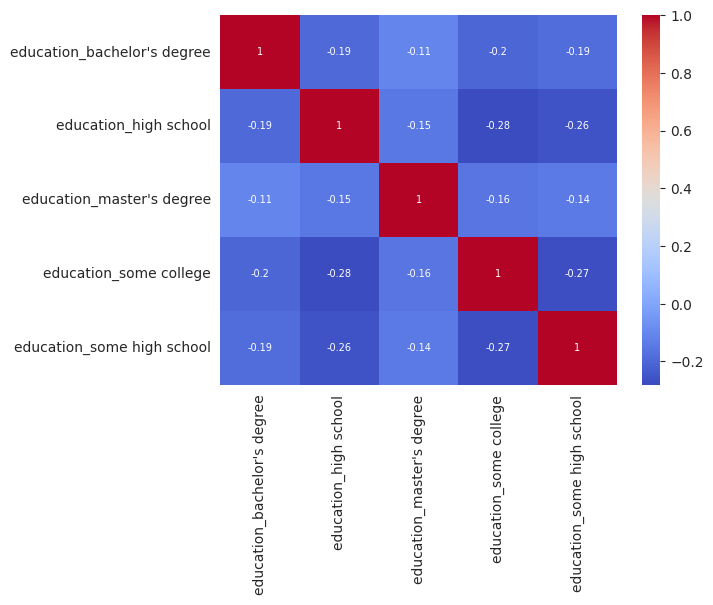

In [ ]:
selected_education_features = data[['education_bachelor\'s degree', 'education_high school', 'education_master\'s degree', 'education_some college', 'education_some high school']]
correlation_matrix_education = selected_education_features.corr()
sns.heatmap(correlation_matrix_education, annot=True, cmap="coolwarm", annot_kws={"size": 7})
plt.show()

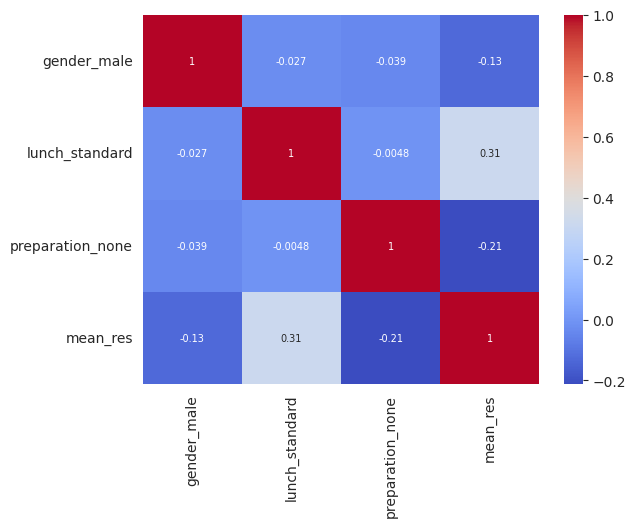

In [ ]:
selected_education_features = data[['gender_male', 'lunch_standard',	'preparation_none',	'mean_res']]
correlation_matrix_education = selected_education_features.corr()
sns.heatmap(correlation_matrix_education, annot=True, cmap="coolwarm", annot_kws={"size": 7})
plt.show()

# Model Train and Predict

### Функция для подсчета метрик качества модели многоклассовой классификации

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(y_true, y_pred, y_pred_proba, model_name, threshold=None):
    """
    Функция для подсчета метрик качества модели классификации.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_pred_proba -- вероятности предсказаний
    model_name -- название модели
    threshold -- порог для классификации (по умолчанию None)

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {'Model': model_name}

    if len(np.unique(y_true)) == 2:  # Бинарная классификация
        if threshold is not None:
            y_pred_thresholded = (y_pred_proba[:, 1] >= threshold).astype(int)
            metrics['Accuracy'] = accuracy_score(y_true, y_pred_thresholded)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            metrics['Precision'] = precision_score(y_true, y_pred_thresholded)
            metrics['Recall'] = recall_score(y_true, y_pred_thresholded)
            metrics['F1 Score'] = f1_score(y_true, y_pred_thresholded)
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred_thresholded).tolist()
        else:
            metrics['Accuracy'] = accuracy_score(y_true, y_pred)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
            metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
            metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
            metrics['F1 Score'] = f1_score(y_true, y_pred, average='weighted')
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    else:  # Многоклассовая классификация
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision (Micro)'] = precision_score(y_true, y_pred, average='micro')
        metrics['Recall (Micro)'] = recall_score(y_true, y_pred, average='micro')
        metrics['F1 Score (Micro)'] = f1_score(y_true, y_pred, average='micro')
        metrics['Precision (Macro)'] = precision_score(y_true, y_pred, average='macro')
        metrics['Recall (Macro)'] = recall_score(y_true, y_pred, average='macro')
        metrics['F1 Score (Macro)'] = f1_score(y_true, y_pred, average='macro')

    return metrics


## Разбиение данных с использованием train_test_split (со стратификацией данных) и масштабирование

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data['mean_res']
y = data['exam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Проверка соотношения классов в обучающем и тестовом наборах
print("Обучающий набор:")
print(y_train.value_counts(normalize=True))
print("\nТестовый набор:")
print(y_test.value_counts(normalize=True))

Обучающий набор:
exam
4    0.830882
3    0.080882
5    0.076471
2    0.011765
Name: proportion, dtype: float64

Тестовый набор:
exam
4    0.828767
3    0.082192
5    0.075342
2    0.013699
Name: proportion, dtype: float64


In [ ]:
print(X_train[:5], y_train[:5], X_test[:5], y_test[:5])

899    84.000000
598    54.000000
811    57.333333
253    60.666667
290    64.666667
Name: mean_res, dtype: float64 899    4
598    4
811    4
253    4
290    4
Name: exam, dtype: int64 369    61.666667
154    52.000000
404    70.333333
891    65.333333
411    72.000000
Name: mean_res, dtype: float64 369    4
154    4
404    4
891    4
411    4
Name: exam, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1, 1))

In [ ]:
print(X_train_scaled[:5], y_train[:5], X_test_scaled[:5], y_test[:5])

[[ 1.01609757]
 [-1.0723351 ]
 [-0.84028703]
 [-0.60823895]
 [-0.32978126]] 899    4
598    4
811    4
253    4
290    4
Name: exam, dtype: int64 [[-0.46761413]
 [-1.12298594]
 [ 0.11996059]
 [-0.21902483]
 [ 0.23295573]] 369    4
154    4
404    4
891    4
411    4
Name: exam, dtype: int64


## Бустинг (на примере CatBoostClassifier)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
# Определение стратифицированной кросс-валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

from sklearn.model_selection import GridSearchCV

# Задайте сетку гиперпараметров
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5],
    'l2_leaf_reg': [1, 3, 5]
}

# Создайте экземпляр модели CatBoostClassifier
ctb = CatBoostClassifier(random_seed=42)

# Создайте объект GridSearchCV
grid_search = GridSearchCV(estimator=ctb, param_grid=param_grid, cv=skf, scoring='roc_auc_ovo', n_jobs=-1)

# Выполните поиск по сетке
grid_search.fit(X_train_scaled, y_train)

# Получите лучшие параметры
best_params = grid_search.best_params_

# Выведите оптимальные гиперпараметры
print("Лучшие гиперпараметры:", best_params)

0:	learn: 1.3581724	total: 1.97ms	remaining: 1.96s
1:	learn: 1.3314983	total: 3.91ms	remaining: 1.95s
2:	learn: 1.3062599	total: 4.94ms	remaining: 1.64s
3:	learn: 1.2816461	total: 5.97ms	remaining: 1.49s
4:	learn: 1.2588090	total: 6.84ms	remaining: 1.36s
5:	learn: 1.2350362	total: 7.75ms	remaining: 1.28s
6:	learn: 1.2131478	total: 8.72ms	remaining: 1.24s
7:	learn: 1.1920916	total: 9.52ms	remaining: 1.18s
8:	learn: 1.1724328	total: 11.2ms	remaining: 1.24s
9:	learn: 1.1538508	total: 12.3ms	remaining: 1.22s
10:	learn: 1.1342711	total: 13.9ms	remaining: 1.25s
11:	learn: 1.1151414	total: 15.1ms	remaining: 1.25s
12:	learn: 1.0963046	total: 15.9ms	remaining: 1.21s
13:	learn: 1.0797381	total: 16.7ms	remaining: 1.18s
14:	learn: 1.0634939	total: 17.7ms	remaining: 1.16s
15:	learn: 1.0466161	total: 18.7ms	remaining: 1.15s
16:	learn: 1.0299387	total: 19.9ms	remaining: 1.15s
17:	learn: 1.0143106	total: 20.8ms	remaining: 1.14s
18:	learn: 0.9997737	total: 21.8ms	remaining: 1.13s
19:	learn: 0.9849354	t

In [ ]:
ctb = CatBoostClassifier(random_seed=42, **best_params)

# Обучение модели с кросс-валидацией
cv_scores = []
for train_idx, test_idx in skf.split(X_train_scaled, y_train):
    cv_train_X, cv_valid_X = X_train_scaled[train_idx], X_train_scaled[test_idx]
    cv_train_y, cv_valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]  # Используйте .iloc для доступа по индексу

    ctb.fit(cv_train_X, cv_train_y)

    cv_scores.append(roc_auc_score(cv_valid_y, ctb.predict_proba(cv_valid_X), multi_class='ovo'))

# Вычисление среднего ROC AUC на кросс-валидации
mean_cv_score = np.mean(cv_scores)

# Обучение модели на всем обучающем наборе данных
ctb.fit(X_train_scaled, y_train)

# Оценка модели на тестовых данных
roc_auc_1 = roc_auc_score(y_test, ctb.predict_proba(X_test_scaled), multi_class='ovo')

# Предсказание классов и вероятностей для тестовых данных
y_pred = ctb.predict(X_test_scaled)
y_pred_proba = ctb.predict_proba(X_test_scaled)

# Вывод результатов
print("Средний ROC AUC на кросс-валидации:", mean_cv_score)
print("ROC AUC на тестовых данных:", roc_auc_1)
for i, j in zip(y_pred, y_pred_proba):
    print(i, ' ', j)

Выходные данные были обрезаны до нескольких последних строк (5000).
294:	learn: 0.0625838	total: 535ms	remaining: 1.28s
295:	learn: 0.0620435	total: 544ms	remaining: 1.29s
296:	learn: 0.0615782	total: 547ms	remaining: 1.29s
297:	learn: 0.0610382	total: 548ms	remaining: 1.29s
298:	learn: 0.0605555	total: 550ms	remaining: 1.29s
299:	learn: 0.0600525	total: 552ms	remaining: 1.29s
300:	learn: 0.0596510	total: 554ms	remaining: 1.29s
301:	learn: 0.0591707	total: 563ms	remaining: 1.3s
302:	learn: 0.0587768	total: 566ms	remaining: 1.3s
303:	learn: 0.0582350	total: 567ms	remaining: 1.3s
304:	learn: 0.0577304	total: 570ms	remaining: 1.3s
305:	learn: 0.0572062	total: 572ms	remaining: 1.3s
306:	learn: 0.0568337	total: 574ms	remaining: 1.29s
307:	learn: 0.0563615	total: 578ms	remaining: 1.3s
308:	learn: 0.0558952	total: 581ms	remaining: 1.3s
309:	learn: 0.0555014	total: 583ms	remaining: 1.3s
310:	learn: 0.0550863	total: 586ms	remaining: 1.3s
311:	learn: 0.0547184	total: 592ms	remaining: 1.3s
312:	l

In [ ]:
metrics_1 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Boosting №1')
print("Метрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Boosting №1
Accuracy: 0.9897260273972602
Precision (Micro): 0.9897260273972602
Recall (Micro): 0.9897260273972602
F1 Score (Micro): 0.9897260273972602
Precision (Macro): 0.9870728216138844
Recall (Macro): 0.978133608815427
F1 Score (Macro): 0.9820284874744759


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        24
           4       0.99      1.00      0.99       242
           5       0.96      1.00      0.98        22

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292



## Бэггинг

### Model Bagging SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# Define the stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'base_estimator__C': [0.1, 1, 10],  # Hyperparameters for the base estimator SVC
    'base_estimator__kernel': ['linear', 'rbf'],  # Hyperparameters for the base estimator SVC
    'n_estimators': [50, 100, 150],  # Number of estimators in the BaggingClassifier ensemble
}

# Create an instance of the BaggingClassifier model with a base estimator of SVC
base_estimator = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(base_estimator=base_estimator, random_state=42),
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best hyperparameters
print("Best hyperparameters:", best_params)

# Create the model with the best parameters
bagging_model = BaggingClassifier(base_estimator=SVC(C=best_params['base_estimator__C'], kernel=best_params['base_estimator__kernel']), n_estimators=best_params['n_estimators'], random_state=42).fit(X_train_scaled, y_train)
y_pred = bagging_model.predict(X_test_scaled)
y_pred_proba = bagging_model.predict_proba(X_test_scaled)

Best hyperparameters: {'base_estimator__C': 0.1, 'base_estimator__kernel': 'linear', 'n_estimators': 50}


In [ ]:
metrics_2 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Bagging SVC №2')
print("Метрики качества модели:")
for metric, value in metrics_2.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Bagging SVC №2
Accuracy: 0.9452054794520548
Precision (Micro): 0.9452054794520548
Recall (Micro): 0.9452054794520548
F1 Score (Micro): 0.9452054794520548
Precision (Macro): 0.6881889763779527
Recall (Macro): 0.6212121212121212
F1 Score (Macro): 0.6507697947214076


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.80      0.67      0.73        24
           4       0.95      1.00      0.98       242
           5       1.00      0.82      0.90        22

    accuracy                           0.95       292
   macro avg       0.69      0.62      0.65       292
weighted avg       0.93      0.95      0.94       292



In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate ROC AUC score for bagging_model
roc_auc_2 = roc_auc_score(y_test, bagging_model.predict_proba(X_test_scaled), multi_class='ovo')
print("ROC AUC score for bagging_model:", roc_auc_2)
# Iterate over predictions and probabilities of both models
for i, j, k, m in zip(y_pred, y_pred_proba, bagging_model.predict(X_test_scaled), bagging_model.predict_proba(X_test_scaled)):
    print(i, ' ', j, ' ', k, ' ', m)

ROC AUC score for bagging_model: 0.8402777777777778
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
3   [0. 1. 0. 0.]   3   [0. 1. 0. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
3   [0. 1. 0. 0.]   3   [0. 1. 0. 0.]
4   [0.   0.   0.78 0.22]   4   [0.   0.   0.78 0.22]
4   [0. 0. 1. 0.]   

### Model Bagging KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# Define the stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'base_estimator__n_neighbors': [3, 5, 7],  # Hyperparameters for the base estimator KNeighborsClassifier
    'n_estimators': [50, 100, 150],  # Number of estimators in the BaggingClassifier ensemble
}

# Create an instance of the BaggingClassifier model with a base estimator of KNeighborsClassifier
base_estimator = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(base_estimator=base_estimator, random_state=42),
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best hyperparameters
print("Best hyperparameters:", best_params)

# Create the model with the best parameters
bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=best_params['base_estimator__n_neighbors']), n_estimators=best_params['n_estimators'], random_state=42).fit(X_train_scaled, y_train)
y_pred = bagging_model.predict(X_test_scaled)
y_pred_proba = bagging_model.predict_proba(X_test_scaled)

Best hyperparameters: {'base_estimator__n_neighbors': 3, 'n_estimators': 50}


In [ ]:
metrics_3 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Bagging KNN №3')
print("Метрики качества модели:")
for metric, value in metrics_3.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Bagging KNN №3
Accuracy: 0.9897260273972602
Precision (Micro): 0.9897260273972602
Recall (Micro): 0.9897260273972602
F1 Score (Micro): 0.9897260273972602
Precision (Macro): 0.9870728216138844
Recall (Macro): 0.978133608815427
F1 Score (Macro): 0.9820284874744759


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        24
           4       0.99      1.00      0.99       242
           5       0.96      1.00      0.98        22

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292



In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate ROC AUC score for bagging_model
roc_auc_3 = roc_auc_score(y_test, bagging_model.predict_proba(X_test_scaled), multi_class='ovo')
print("ROC AUC score for bagging_model:", roc_auc_3)
# Iterate over predictions and probabilities of both models
for i, j, k, m in zip(y_pred, y_pred_proba, bagging_model.predict(X_test_scaled), bagging_model.predict_proba(X_test_scaled)):
    print(i, ' ', j, ' ', k, ' ', m)

ROC AUC score for bagging_model: 0.9826101928374654
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
3   [0. 1. 0. 0.]   3   [0. 1. 0. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
2   [0.82666667 0.17333333 0.         0.        ]   2   [0.82666667 0.17333333 0.         0.        ]
5   [0. 0.

### Model Bagging Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define the hyperparameter grid
param_grid = {
    'base_estimator__max_depth': range(2, 10),  # Maximum depth of the base estimator DecisionTreeClassifier
    'base_estimator__min_samples_split': range(2, 10)  # Minimum number of samples required to split an internal node
}

# Create an instance of the BaggingClassifier model with a base estimator of DecisionTreeClassifier
base_estimator = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(base_estimator=base_estimator, random_state=42),
    param_grid=param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best hyperparameters
print("Best hyperparameters:", best_params)

# Create the model with the best parameters
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(
                                                                       max_depth=best_params['base_estimator__max_depth'],
                                                                       min_samples_split=best_params['base_estimator__min_samples_split']),
                                  random_state=42).fit(X_train_scaled, y_train)
y_pred = bagging_model.predict(X_test_scaled)
y_pred_proba = bagging_model.predict_proba(X_test_scaled)


Best hyperparameters: {'base_estimator__max_depth': 2, 'base_estimator__min_samples_split': 2}


In [ ]:
metrics_4 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model Bagging Decision Tree №4')
print("Метрики качества модели:")
for metric, value in metrics_4.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Bagging Decision Tree №4
Accuracy: 0.9897260273972602
Precision (Micro): 0.9897260273972602
Recall (Micro): 0.9897260273972602
F1 Score (Micro): 0.9897260273972602
Precision (Macro): 0.9870728216138844
Recall (Macro): 0.978133608815427
F1 Score (Macro): 0.9820284874744759


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        24
           4       0.99      1.00      0.99       242
           5       0.96      1.00      0.98        22

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292



In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate ROC AUC score for bagging_model
roc_auc_4 = roc_auc_score(y_test, bagging_model.predict_proba(X_test_scaled), multi_class='ovo')
print("ROC AUC score for bagging_model:", roc_auc_4)
# Iterate over predictions and probabilities of both models
for i, j, k, m in zip(y_pred, y_pred_proba, bagging_model.predict(X_test_scaled), bagging_model.predict_proba(X_test_scaled)):
    print(i, ' ', j, ' ', k, ' ', m)

ROC AUC score for bagging_model: 0.982811065197429
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
3   [0. 1. 0. 0.]   3   [0. 1. 0. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
4   [0. 0. 1. 0.]   4   [0. 0. 1. 0.]
2   [0.98 0.02 0.   0.  ]   2   [0.98 0.02 0.   0.  ]
5   [0. 0. 0. 1.]   5   [0. 0. 0. 1.]
4   [0. 0. 1. 0.]   4

## Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### Model Stacking №1

In [ ]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelClf = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True))
modelClf.fit(X_train_scaled, y_train)
y_pred = modelClf.predict_proba(X_test_scaled)
y_pred_proba = modelClf.predict(X_test_scaled)

In [ ]:
metrics_5 = calculate_classification_metrics(y_test, y_pred_proba, y_pred, 'Model Stacking №5')
print("Метрики качества модели:")
for metric, value in metrics_5.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Stacking №5
Accuracy: 0.9897260273972602
Precision (Micro): 0.9897260273972602
Recall (Micro): 0.9897260273972602
F1 Score (Micro): 0.9897260273972602
Precision (Macro): 0.9870728216138844
Recall (Macro): 0.978133608815427
F1 Score (Macro): 0.9820284874744759


In [ ]:
roc_auc_5 = roc_auc_score(y_test, modelClf.predict_proba(X_test_scaled), multi_class='ovo')
print("ROC AUC Score:", roc_auc_5)

ROC AUC Score: 0.9764874989565072


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        24
           4       0.99      1.00      0.99       242
           5       0.96      1.00      0.98        22

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292



### Model Stacking №2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
estimators = [('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier()), ('bayes', GaussianNB()),
              ('rf', RandomForestClassifier())]
modelClf_1 = StackingClassifier(estimators=estimators, final_estimator= GaussianNB())
modelClf_1.fit(X_train_scaled, y_train)
y_pred = modelClf_1.predict_proba(X_test_scaled)
y_pred_proba = modelClf_1.predict(X_test_scaled)

In [ ]:
metrics_6 = calculate_classification_metrics(y_test, y_pred_proba, y_pred, 'Model Stacking №6')
print("Метрики качества модели:")
for metric, value in metrics_6.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model Stacking №6
Accuracy: 0.9897260273972602
Precision (Micro): 0.9897260273972602
Recall (Micro): 0.9897260273972602
F1 Score (Micro): 0.9897260273972602
Precision (Macro): 0.9870728216138844
Recall (Macro): 0.978133608815427
F1 Score (Macro): 0.9820284874744759


In [ ]:
roc_auc_6 = roc_auc_score(y_test, modelClf_1.predict_proba(X_test_scaled), multi_class='ovo')
print("ROC AUC Score:", roc_auc_6)

ROC AUC Score: 0.9819501836547291


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        24
           4       0.99      1.00      0.99       242
           5       0.96      1.00      0.98        22

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292



# Model Evaluation and Metrics Visualization

In [ ]:
import pandas as pd

# Фильтрация метрик из словарей
model_metrics_1_filtered = {key: value for key, value in metrics_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}
model_metrics_2_filtered = {key: value for key, value in metrics_2.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}
model_metrics_3_filtered = {key: value for key, value in metrics_3.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}
model_metrics_4_filtered = {key: value for key, value in metrics_4.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}
model_metrics_5_filtered = {key: value for key, value in metrics_5.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}
model_metrics_6_filtered = {key: value for key, value in metrics_6.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

# Добавление ROC AUC метрик
model_metrics_1_filtered['roc_auc'] = roc_auc_1
model_metrics_2_filtered['roc_auc'] = roc_auc_2
model_metrics_3_filtered['roc_auc'] = roc_auc_3
model_metrics_4_filtered['roc_auc'] = roc_auc_4
model_metrics_5_filtered['roc_auc'] = roc_auc_5
model_metrics_6_filtered['roc_auc'] = roc_auc_6

# Создание DataFrame
df = pd.DataFrame({
    "Model Boosting №1": model_metrics_1_filtered,
    "Model Bagging SVC №2": model_metrics_2_filtered,
    "Model Bagging KNN №3": model_metrics_3_filtered,
    "Model Bagging Decision Tree №4": model_metrics_4_filtered,
    "Model Stacking №5": model_metrics_5_filtered,
    "Model Stacking №6": model_metrics_6_filtered
})

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df = df.applymap(format_values)

# Вывод DataFrame
display(df)


,Model Boosting №1,Model Bagging SVC №2,Model Bagging KNN №3,Model Bagging Decision Tree №4,Model Stacking №5,Model Stacking №6
Accuracy,0.98972603,0.94520548,0.98972603,0.98972603,0.98972603,0.98972603
Precision (Micro),0.98972603,0.94520548,0.98972603,0.98972603,0.98972603,0.98972603
Recall (Micro),0.98972603,0.94520548,0.98972603,0.98972603,0.98972603,0.98972603
F1 Score (Micro),0.98972603,0.94520548,0.98972603,0.98972603,0.98972603,0.98972603
Precision (Macro),0.98707282,0.68818898,0.98707282,0.98707282,0.98707282,0.98707282
Recall (Macro),0.97813361,0.62121212,0.97813361,0.97813361,0.97813361,0.97813361
F1 Score (Macro),0.98202849,0.65076979,0.98202849,0.98202849,0.98202849,0.98202849
roc_auc,0.99298382,0.84027778,0.98261019,0.98281107,0.97648750,0.98195018


## Визуализация метрик качества с использованием столбчатой диаграммы

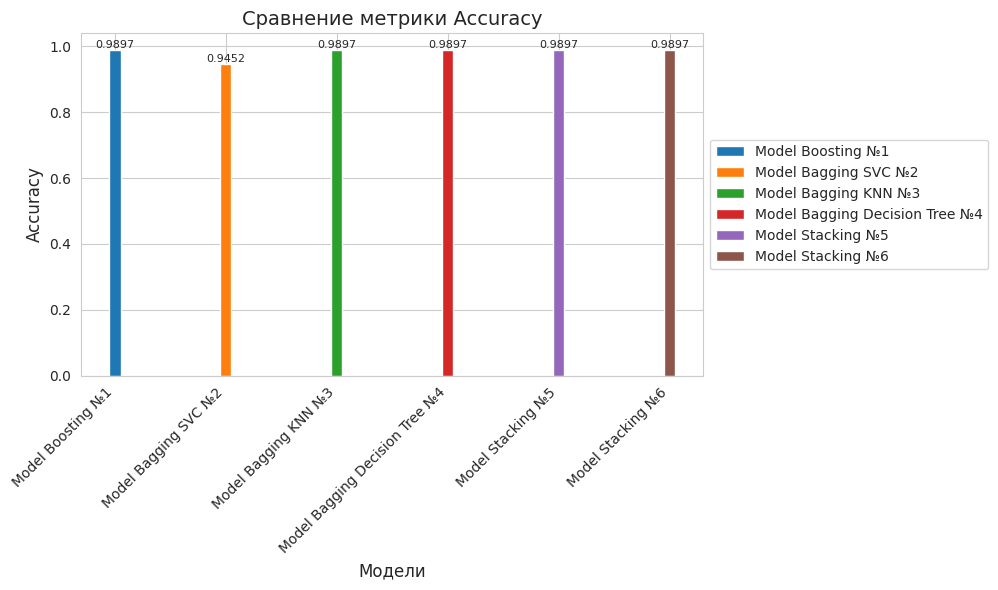

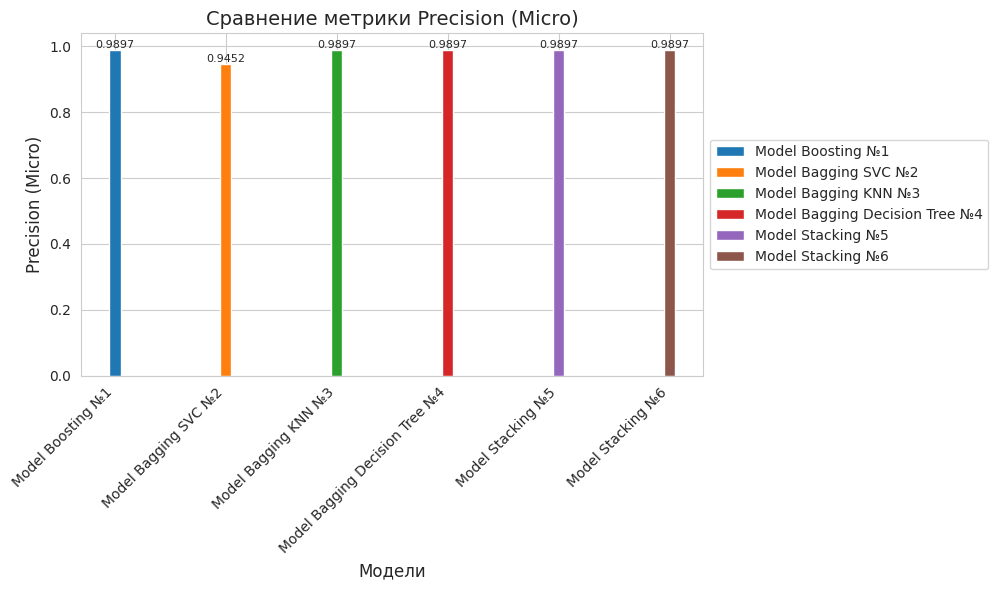

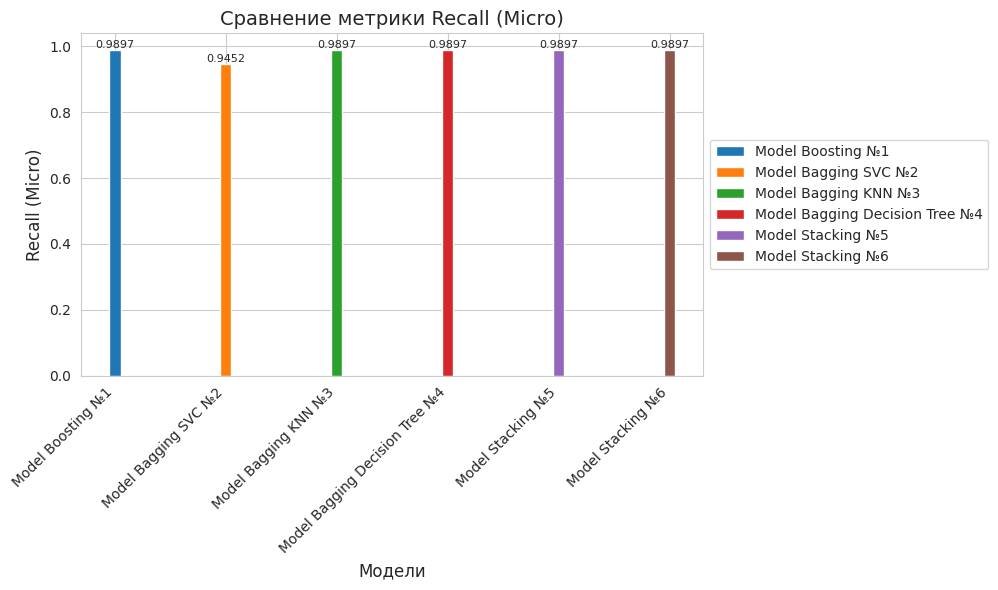

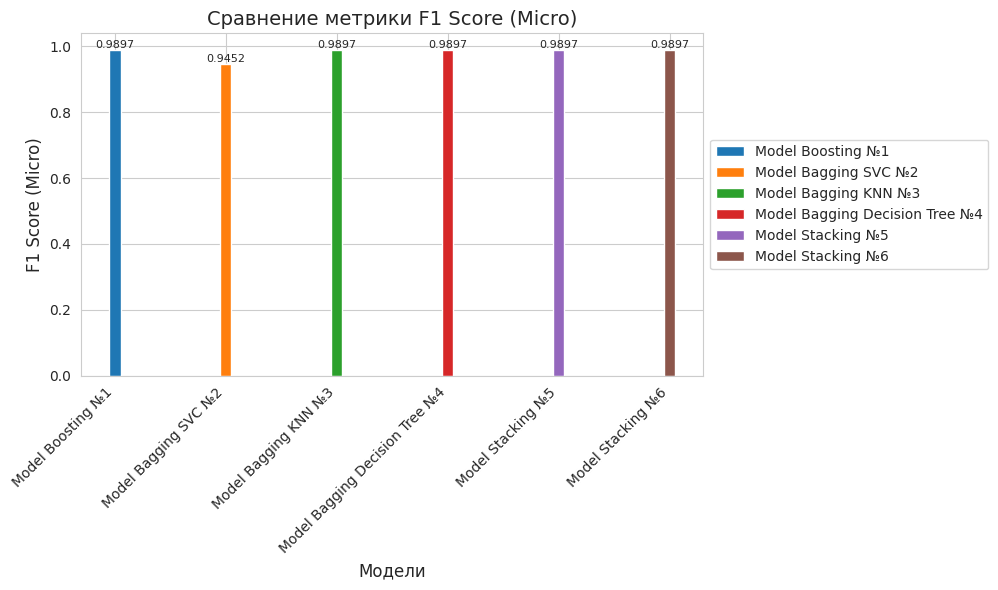

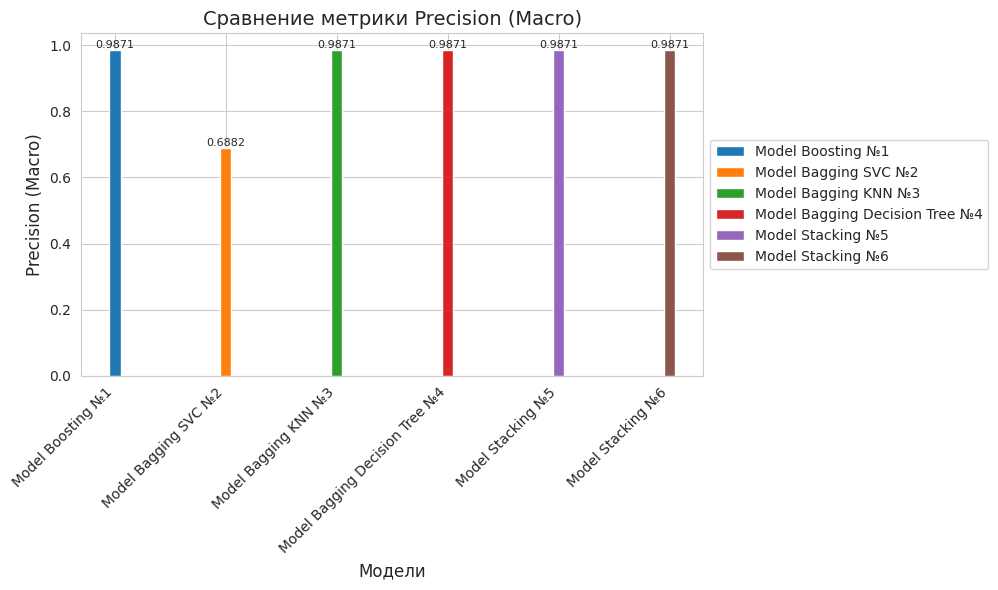

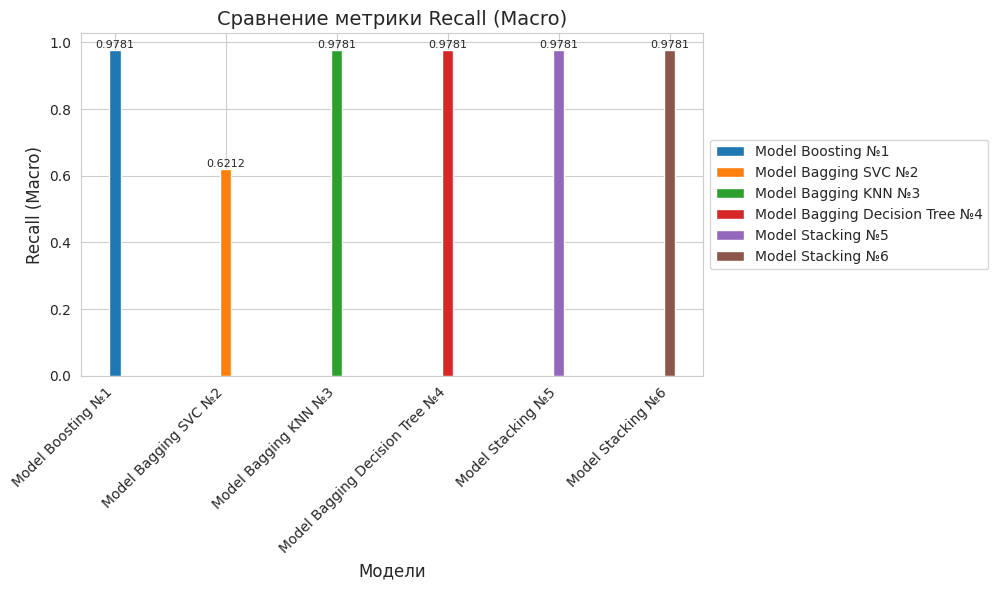

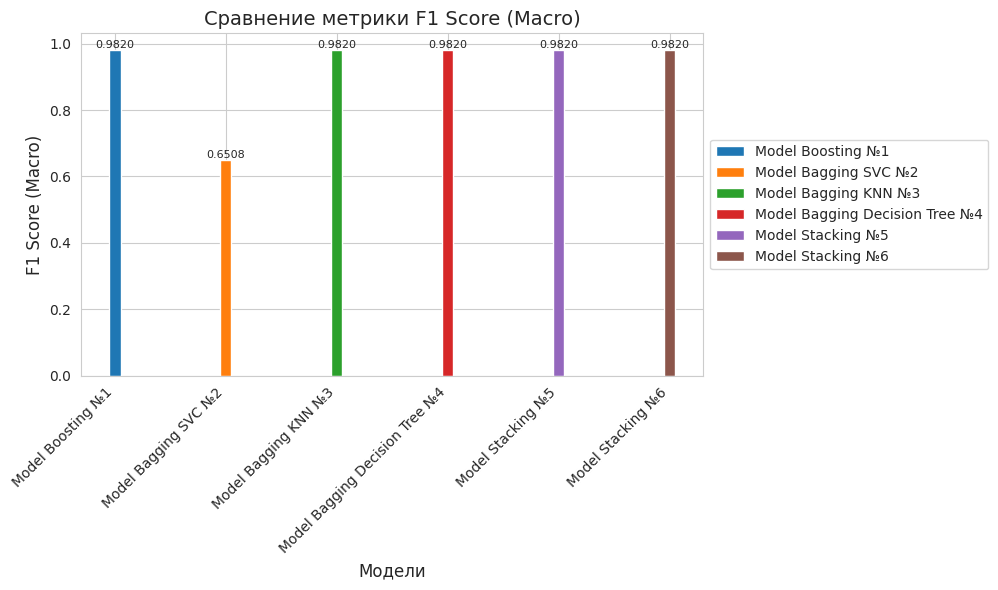

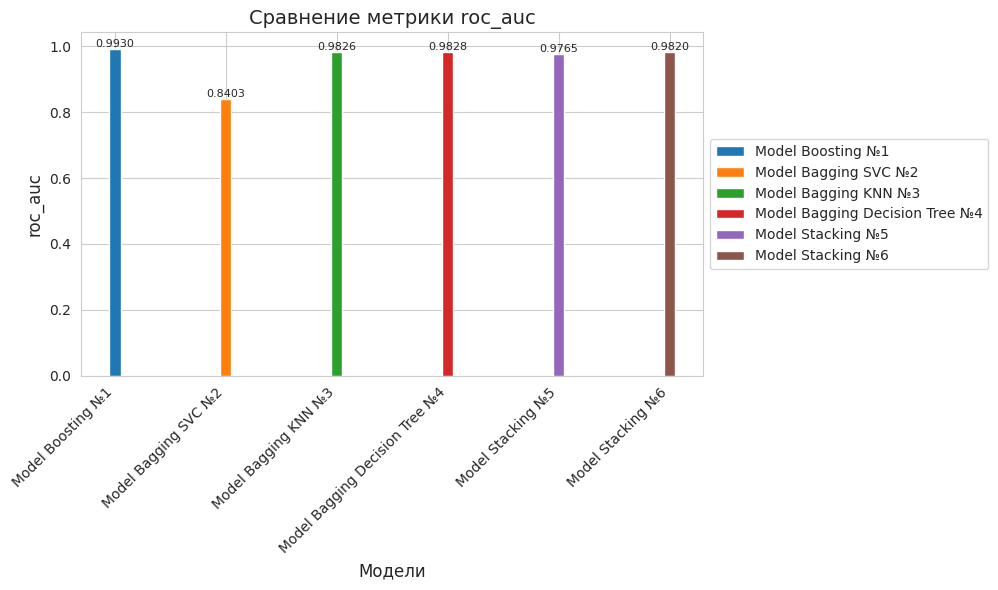

In [ ]:
import matplotlib.pyplot as plt

# Извлечение метрик из словарей
metrics_names = list(model_metrics_1_filtered.keys())
metrics_values_1 = list(model_metrics_1_filtered.values())
metrics_values_2 = list(model_metrics_2_filtered.values())
metrics_values_3 = list(model_metrics_3_filtered.values())
metrics_values_4 = list(model_metrics_4_filtered.values())
metrics_values_5 = list(model_metrics_5_filtered.values())
metrics_values_6 = list(model_metrics_6_filtered.values())

# Создание подписей для столбцов
model_names = ["Model Boosting №1", "Model Bagging SVC №2", "Model Bagging KNN №3", "Model Bagging Decision Tree №4", "Model Stacking №5", "Model Stacking №6"]

# Создание подписей для оси X (метрик)
x = range(len(model_names))

# Ширина столбцов
bar_width = 0.1

# Создание графика для каждой метрики
for i, metric_name in enumerate(metrics_names):
    plt.figure(figsize=(10, 6))
    # Построение столбцов для каждой модели
    for j, (model_name, metric_values) in enumerate(zip(model_names, [metrics_values_1, metrics_values_2, metrics_values_3, metrics_values_4, metrics_values_5, metrics_values_6])):
        plt.bar(j, metric_values[i], width=bar_width, label=model_name)
        # Добавление подписей значений метрик сверху
        plt.text(j, metric_values[i], f'{metric_values[i]:.4f}', ha='center', va='bottom', fontsize=8)

    # Добавление подписей к осям и заголовка
    plt.xlabel('Модели', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f'Сравнение метрики {metric_name}', fontsize=14)
    plt.xticks(x, model_names, fontsize=10, rotation=45, ha='right')

    # Отображение легенды за пределами графика
    plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

    # Отображение графика
    plt.tight_layout()
    plt.show()


## Вывод: модель машинного обучения Model Boosting №1, основанная на алгоритме CatBoostClassifier, оказалась лучшей по метрикам качества для предсказания целевой переменной (оценки, полученной слушателем за экзамен) в рамках данной задачи